# pvlib-Python Forecasting Example (Tucson, AZ)
### Install Standard Release 

In [1]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 199kB/s eta 0:00:01     |██████▋                         | 296kB 759kB/s eta 0:00:02     |██████████▊                     | 481kB 759kB/s eta 0:00:02
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
# Package from the Python Package Index
!pip install pvlib
# Module netCDF4 was not found 
!pip install netCDF4
# Module siphon was not found
!pip install siphon
# Downgrade to the prior release 
!pip install cftime==1.0.4.2
# Learned this from Birk
# Website: https://github.com/pvlib/pvlib-python/issues/895

     |████████████████████████████████| 19.3 MB 9.9 kB/s eta 0:00:011   |▊                               | 419 kB 1.6 MB/s eta 0:00:13     |██████████▍                     | 6.3 MB 1.6 MB/s eta 0:00:093.2 MB/s eta 0:00:04     |█████████████████▏              | 10.4 MB 3.2 MB/s eta 0:00:03     |███████████████████████████████ | 18.7 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.1 MB 201 kB/s eta 0:00:01
     |████████████████████████████████| 328 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 136 kB/s eta 0:00:01
     |████████████████████████████████| 308 kB 2.0 MB/s eta 0:00:01
  Attempting uninstall: cftime
    Found existing installation: cftime 1.1.1.2
    Uninstalling cftime-1.1.1.2:
      Successfully uninstalled cftime-1.1.1.2


In [3]:
# Make basic imports and then set the location and time range data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pytz
import seaborn as sns; sns.set_color_codes()
import datetime

# Import pvlib forecast models
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP
from pvlib import solarposition
from pvlib.location import Location
from matplotlib.pyplot import figure

# Specify Location (Phoenix, AZ)
latitude, longitude, tz = 32.2, -106.6, 'US/Arizona'

# Specify time range
start = pd.Timestamp(datetime.date.today(), tz=tz)
end = start + pd.Timedelta(days=7)
irrad_vars = ['ghi','dni','dhi']

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pvlib/forecast.py:20: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  'The forecast module algorithms and features are highly experimental. '


In [4]:
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

In [5]:
pytz.country_timezones('US')

['America/New_York',
 'America/Detroit',
 'America/Kentucky/Louisville',
 'America/Kentucky/Monticello',
 'America/Indiana/Indianapolis',
 'America/Indiana/Vincennes',
 'America/Indiana/Winamac',
 'America/Indiana/Marengo',
 'America/Indiana/Petersburg',
 'America/Indiana/Vevay',
 'America/Chicago',
 'America/Indiana/Tell_City',
 'America/Indiana/Knox',
 'America/Menominee',
 'America/North_Dakota/Center',
 'America/North_Dakota/New_Salem',
 'America/North_Dakota/Beulah',
 'America/Denver',
 'America/Boise',
 'America/Phoenix',
 'America/Los_Angeles',
 'America/Anchorage',
 'America/Juneau',
 'America/Sitka',
 'America/Metlakatla',
 'America/Yakutat',
 'America/Nome',
 'America/Adak',
 'Pacific/Honolulu']

### Instantiate a GFS model object and get the forecast data from Unidata

In [6]:
# GFS model, defaults to 0.5 degree resolution
# 0.25 deg available 
model = GFS() 

# Retrive data.returns panda.DataFrame object
raw_data = model.get_data(latitude, longitude, start, end)
print(raw_data.head())

                           Total_cloud_cover_entire_atmosphere_Mixed_intervals_Average  \
2020-04-13 09:00:00-07:00                                                0.0             
2020-04-13 12:00:00-07:00                                                0.0             
2020-04-13 15:00:00-07:00                                                0.0             
2020-04-13 18:00:00-07:00                                                0.0             
2020-04-13 21:00:00-07:00                                                0.0             

                           Total_cloud_cover_low_cloud_Mixed_intervals_Average  \
2020-04-13 09:00:00-07:00                                                0.0     
2020-04-13 12:00:00-07:00                                                0.0     
2020-04-13 15:00:00-07:00                                                0.0     
2020-04-13 18:00:00-07:00                                                0.0     
2020-04-13 21:00:00-07:00                        

### Process Data with pvlib

In [7]:
# Process this data before using it with pvlib
data = raw_data

# Rename the columns according the key/value pairs in model.variables.
data = model.rename(data)

# Convert temperature
data['temp_air'] = model.kelvin_to_celsius(data['temp_air'])

# Convert wind components to wind speed
data['wind_speed'] = model.uv_to_speed(data)

# Calculate irradiance estimates from cloud cover.
irrad_data = model.cloud_cover_to_irradiance(data['total_clouds'])
data = data.join(irrad_data, how='outer')

# Keep only the final data
data = data[model.output_variables]

print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-04-13 09:00:00-07:00  11.018311    4.966851  609.587066  850.728400   
2020-04-13 12:00:00-07:00   8.950012    3.481290  965.675455  848.690673   
2020-04-13 15:00:00-07:00  19.557495    6.059538  753.730195  863.739843   
2020-04-13 18:00:00-07:00  34.888641    8.356499  117.410796  390.814636   
2020-04-13 21:00:00-07:00  37.188629    9.399778    0.000000    0.000000   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-04-13 09:00:00-07:00   88.715221           0.0         0.0         0.0   
2020-04-13 12:00:00-07:00  187.044804           0.0         0.0         0.0   
2020-04-13 15:00:00-07:00  117.940592           0.0         0.0         0.0   
2020-04-13 18:00:00-07:00   49.084521           0.0         0.0         0.0   
2020-04-13 21:00:00-07:00    0.000000           0.0         0.0         0.0   

                           high_clouds  
2020-04-13 09:00:00-07:00  

### GFS'S Class

In [8]:
# process_data method combines these steps in a single function
data = model.process_data(raw_data)
print(data.head())

# Implement their own process_data methods on inherited classes or implement similar stand-alone functions
# Also implement a get_processed_data() method that combines the get_data() and process_data() calls
data = model.get_processed_data(latitude, longitude, start, end)
print(data.head())

                            temp_air  wind_speed         ghi         dni  \
2020-04-13 09:00:00-07:00  11.018311    4.966851  609.587066  850.728400   
2020-04-13 12:00:00-07:00   8.950012    3.481290  965.675455  848.690673   
2020-04-13 15:00:00-07:00  19.557495    6.059538  753.730195  863.739843   
2020-04-13 18:00:00-07:00  34.888641    8.356499  117.410796  390.814636   
2020-04-13 21:00:00-07:00  37.188629    9.399778    0.000000    0.000000   

                                  dhi  total_clouds  low_clouds  mid_clouds  \
2020-04-13 09:00:00-07:00   88.715221           0.0         0.0         0.0   
2020-04-13 12:00:00-07:00  187.044804           0.0         0.0         0.0   
2020-04-13 15:00:00-07:00  117.940592           0.0         0.0         0.0   
2020-04-13 18:00:00-07:00   49.084521           0.0         0.0         0.0   
2020-04-13 21:00:00-07:00    0.000000           0.0         0.0         0.0   

                           high_clouds  
2020-04-13 09:00:00-07:00  

## Cloud Cover & Radiation

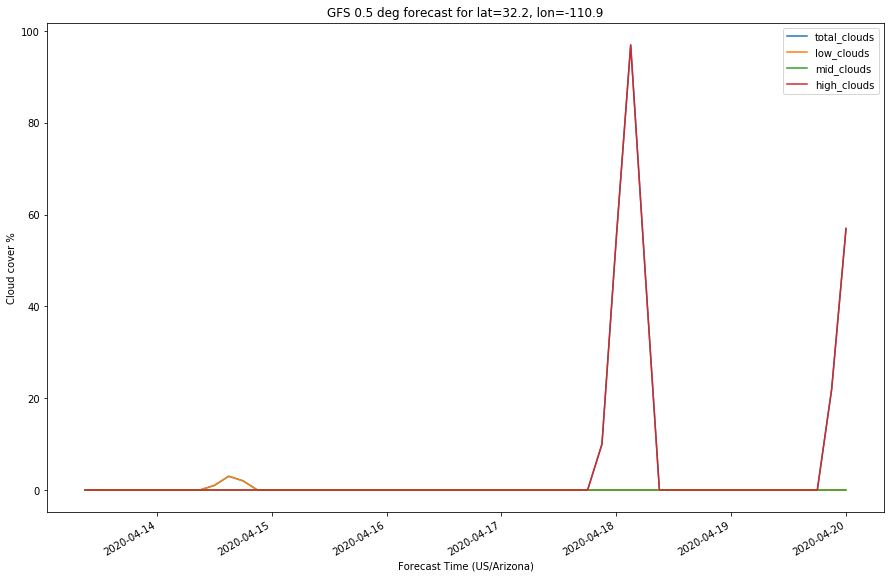

In [9]:
# Plot cloud cover percentages
cloud_vars = ['total_clouds', 'low_clouds','mid_clouds', 'high_clouds']
data[cloud_vars].plot(figsize=(15,10));
plt.ylabel('Cloud cover %');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

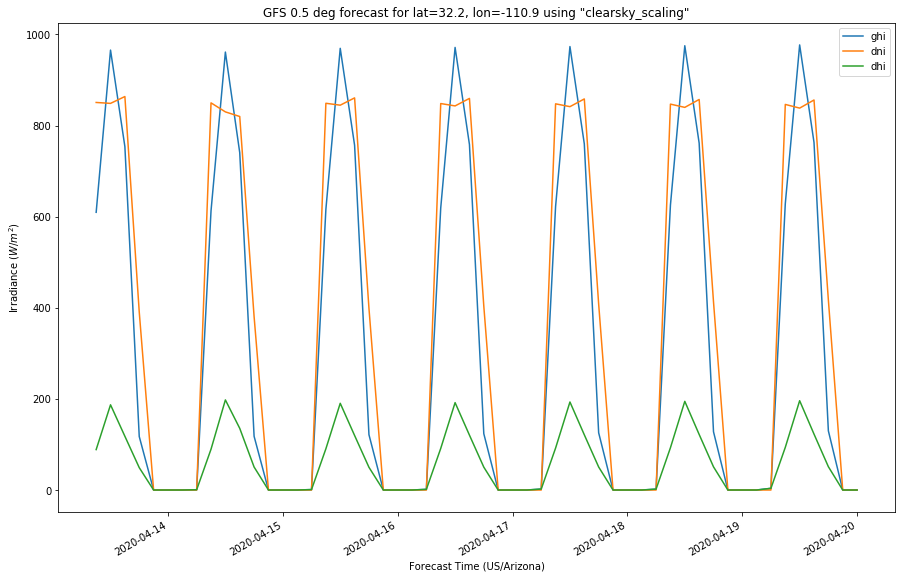

In [10]:
# Plot irradiance data
data = model.rename(raw_data)
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='clearsky_scaling')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "clearsky_scaling"'.format(latitude, longitude));
plt.legend();

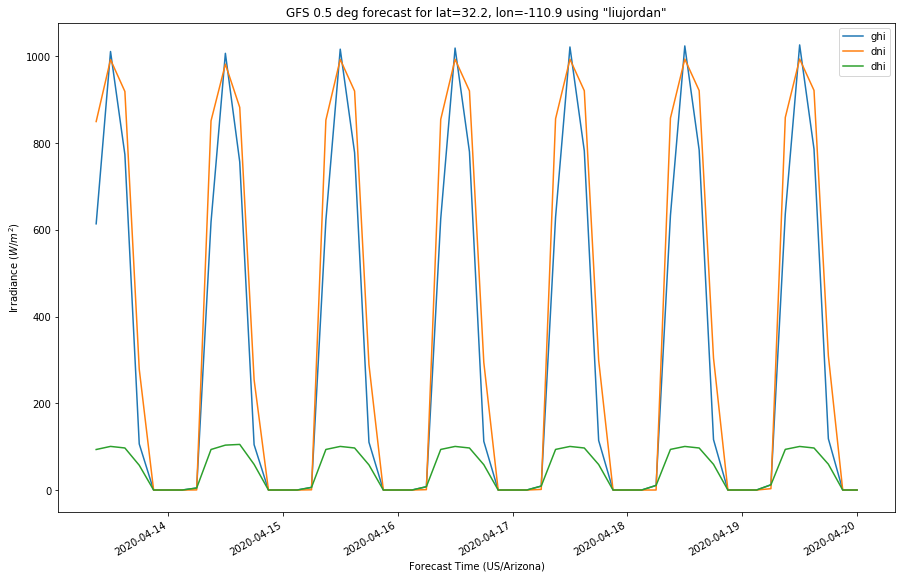

In [11]:
# Plot irradiance data
# Irradiance forecast one hour resolution as the weather data
irrads = model.cloud_cover_to_irradiance(data['total_clouds'], how='liujordan')
irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} using "liujordan"'.format(latitude, longitude));
plt.legend();

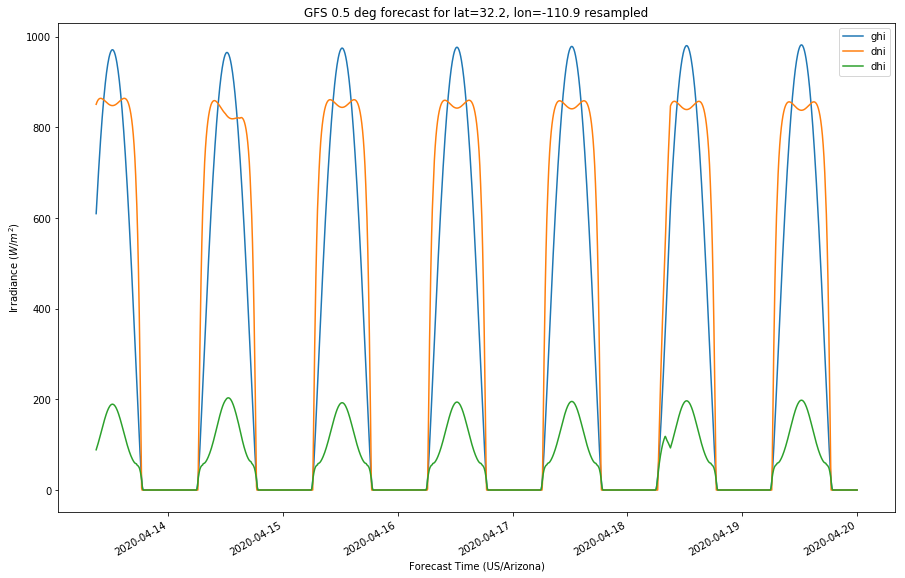

In [12]:
# Five min data resample
resampled_data = data.resample('5min').interpolate()
resampled_irrads = model.cloud_cover_to_irradiance(resampled_data['total_clouds'], how='clearsky_scaling')
resampled_irrads.plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('GFS 0.5 deg forecast for lat={}, lon={} resampled'.format(latitude,longitude));
plt.legend();

In [13]:
resampled_irrads

,ghi,dni,dhi
2020-04-13 09:00:00-07:00,609.587066,850.728400,88.715221
2020-04-13 09:05:00-07:00,625.898473,853.339973,91.446215
2020-04-13 09:10:00-07:00,641.920854,855.598876,94.260535
2020-04-13 09:15:00-07:00,657.645498,857.531607,97.154095
2020-04-13 09:20:00-07:00,673.063934,859.162804,100.122278
2020-04-13 09:25:00-07:00,688.167935,860.515494,103.159931
2020-04-13 09:30:00-07:00,702.949497,861.611295,106.261360
2020-04-13 09:35:00-07:00,717.400850,862.470588,109.420338
2020-04-13 09:40:00-07:00,731.514445,863.112653,112.630129
2020-04-13 09:45:00-07:00,745.282947,863.555782,115.883497


## Weather Models
### GFS

In [18]:
# The Global Forecast System is the US model that provides forecast for the entire globe
# It is updated every six hours

### HRRR

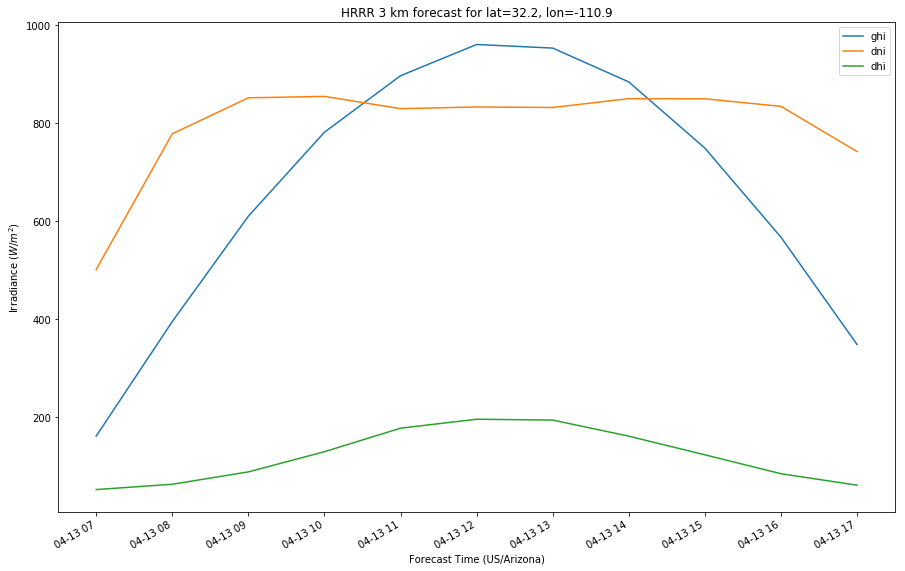

In [19]:
# High Resolution Rapid Refresh most accurate
# Only available for 15 hours
model = HRRR()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('HRRR 3 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

### RAP

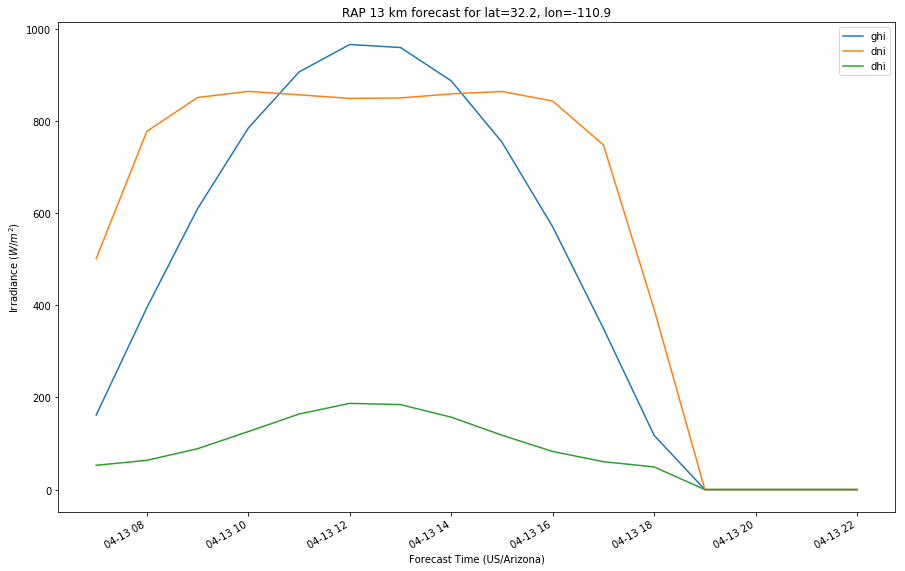

In [20]:
# The Rapid Refresh model is the parent model for the HRRR
# Updated every hour with a 20, 40 km resolution
model = RAP()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('RAP 13 km forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

### NDFD

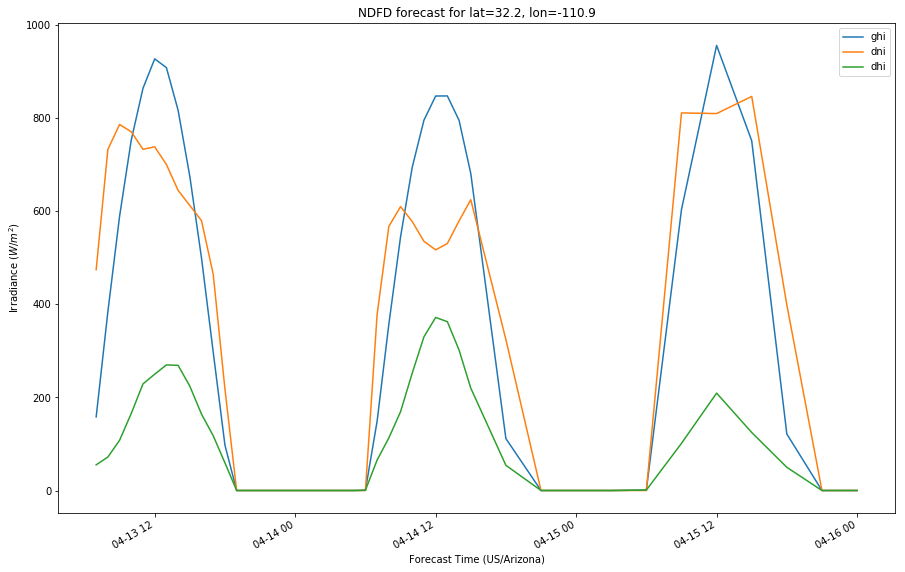

In [21]:
# The National Digital Forecast Database is not a model
# Is a collection of forecasts made by National Weather Service offices accross the country
# Updated every six hours
# Only available for the US
model = NDFD()
data = model.get_processed_data(latitude, longitude, start, end)
data[irrad_vars].plot(figsize=(15,10));
plt.ylabel('Irradiance ($W/m^2$)');
plt.xlabel('Forecast Time ({})'.format(tz));
plt.title('NDFD forecast for lat={}, lon={}'.format(latitude, longitude));
plt.legend();

## PV Power Forecast

In [22]:
from pvlib.pvsystem import PVSystem, retrieve_sam
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib.tracking import SingleAxisTracker
from pvlib.modelchain import ModelChain

sandia_modules = retrieve_sam('sandiamod')
cec_inverters = retrieve_sam('cecinverter')
module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
inverter = cec_inverters['SMA_America__SC630CP_US__with_ABB_EcoDry_Ultra_transformer_']
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

# model a big tracker for more fun
system = SingleAxisTracker(module_parameters=module, inverter_parameters=inverter, temperature_model_parameters=temperature_model_parameters, modules_per_string=15, strings_per_inverter=300)

# fx is a common abbreviation for forecast
fx_model = GFS()
fx_data = fx_model.get_processed_data(latitude, longitude, start, end)

# use a ModelChain object to calculate modeling intermediates
mc = ModelChain(system, fx_model.location)

# extract relevant data for model chain
mc.run_model(fx_data)

ModelChain: 
  name: None
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: snlinverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

## Modeling intermediates & Forecast power

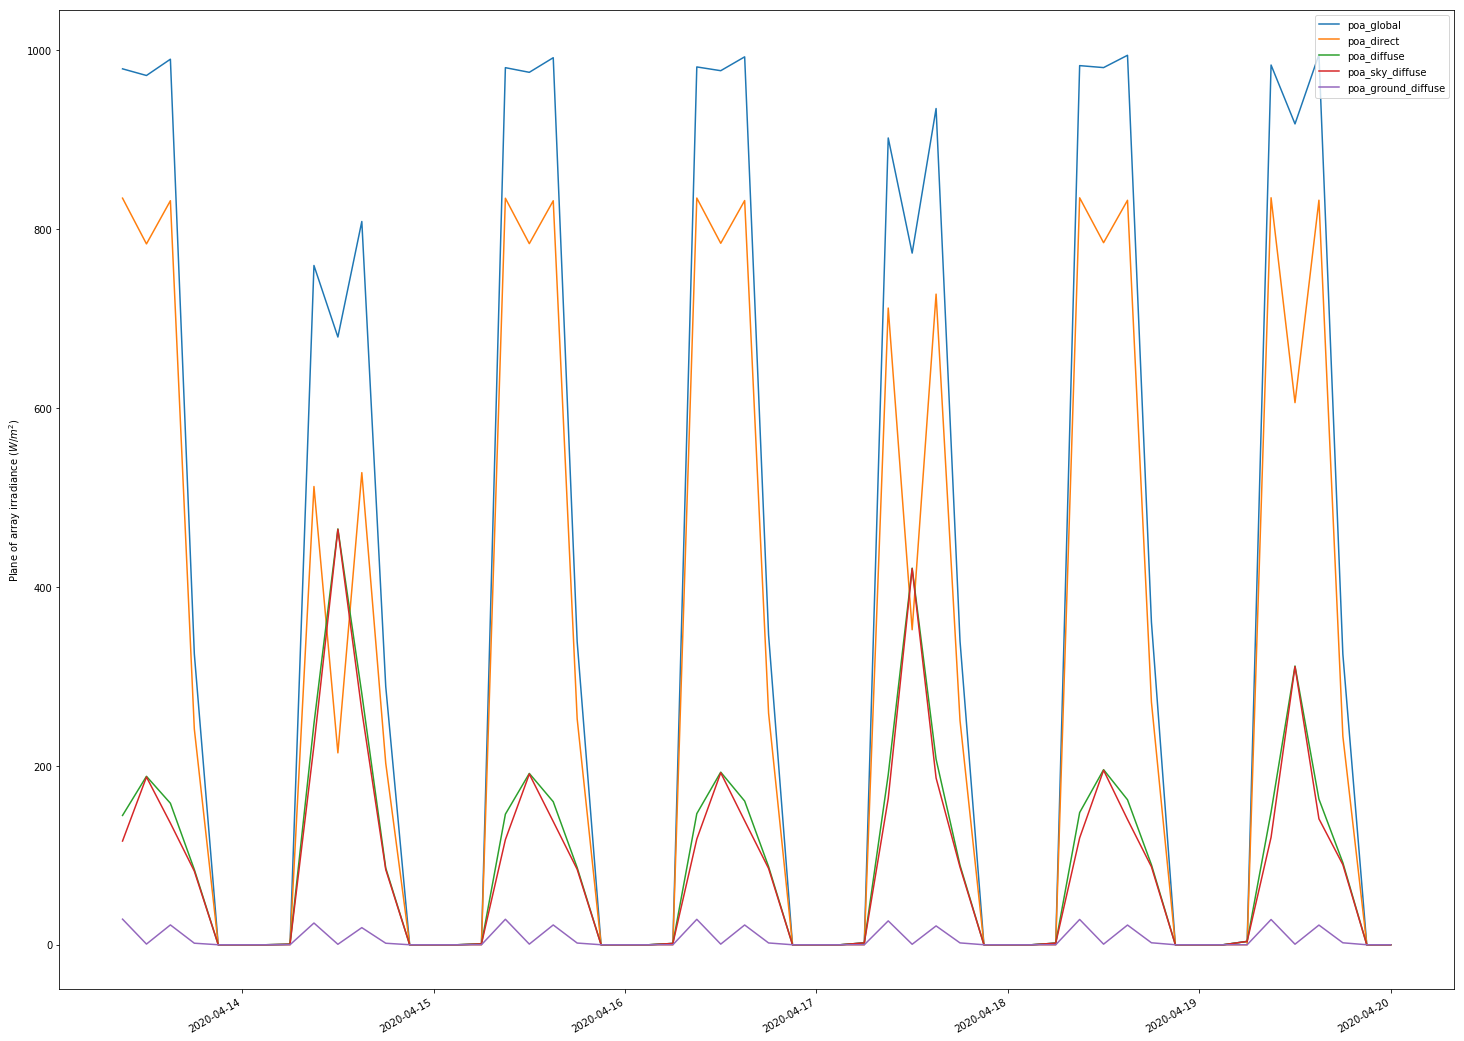

In [23]:
mc.total_irrad.plot(figsize=(25,20));
plt.ylabel('Plane of array irradiance ($W/m^2$)');
plt.legend(loc='best');

In [29]:
mc.total_irrad

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2020-04-13 09:00:00-07:00,979.309417,834.734497,144.574919,115.947331,28.627588
2020-04-13 12:00:00-07:00,971.862548,783.551954,188.310594,187.559067,0.751527
2020-04-13 15:00:00-07:00,990.070106,831.874476,158.195630,136.005360,22.190270
2020-04-13 18:00:00-07:00,325.317984,241.238901,84.079083,82.350854,1.728229
2020-04-13 21:00:00-07:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2020-04-14 00:00:00-07:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2020-04-14 03:00:00-07:00,0.000000,-0.000000,0.000000,0.000000,0.000000
2020-04-14 06:00:00-07:00,0.599474,0.000000,0.599474,0.599443,0.000031
2020-04-14 09:00:00-07:00,759.449636,512.328105,247.121531,222.829978,24.291553
2020-04-14 12:00:00-07:00,679.460399,214.541558,464.918842,464.405433,0.513409


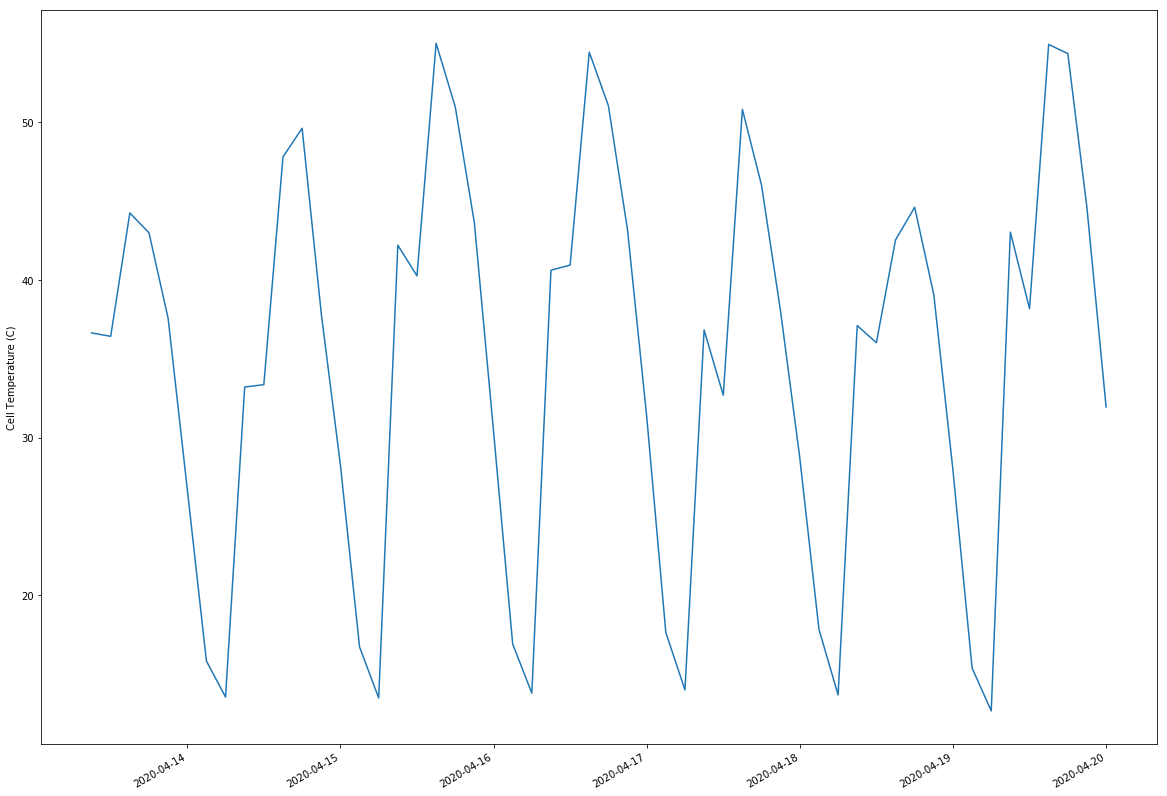

In [24]:
# Cell and module temperature
mc.cell_temperature.plot(figsize=(20,15));
plt.ylabel('Cell Temperature (C)');

In [28]:
mc.cell_temperature

2020-04-13 09:00:00-07:00    36.627510
2020-04-13 12:00:00-07:00    36.412535
2020-04-13 15:00:00-07:00    44.228230
2020-04-13 18:00:00-07:00    42.973527
2020-04-13 21:00:00-07:00    37.550018
2020-04-14 00:00:00-07:00    26.742523
2020-04-14 03:00:00-07:00    15.842499
2020-04-14 06:00:00-07:00    13.559154
2020-04-14 09:00:00-07:00    33.201361
2020-04-14 12:00:00-07:00    33.349660
2020-04-14 15:00:00-07:00    47.777470
2020-04-14 18:00:00-07:00    49.597232
2020-04-14 21:00:00-07:00    37.862122
2020-04-15 00:00:00-07:00    28.264740
2020-04-15 03:00:00-07:00    16.733002
2020-04-15 06:00:00-07:00    13.502399
2020-04-15 09:00:00-07:00    42.187961
2020-04-15 12:00:00-07:00    40.242828
2020-04-15 15:00:00-07:00    54.981856
2020-04-15 18:00:00-07:00    50.950981
2020-04-15 21:00:00-07:00    43.593964
2020-04-16 00:00:00-07:00    30.400818
2020-04-16 03:00:00-07:00    16.918304
2020-04-16 06:00:00-07:00    13.807661
2020-04-16 09:00:00-07:00    40.603253
2020-04-16 12:00:00-07:00

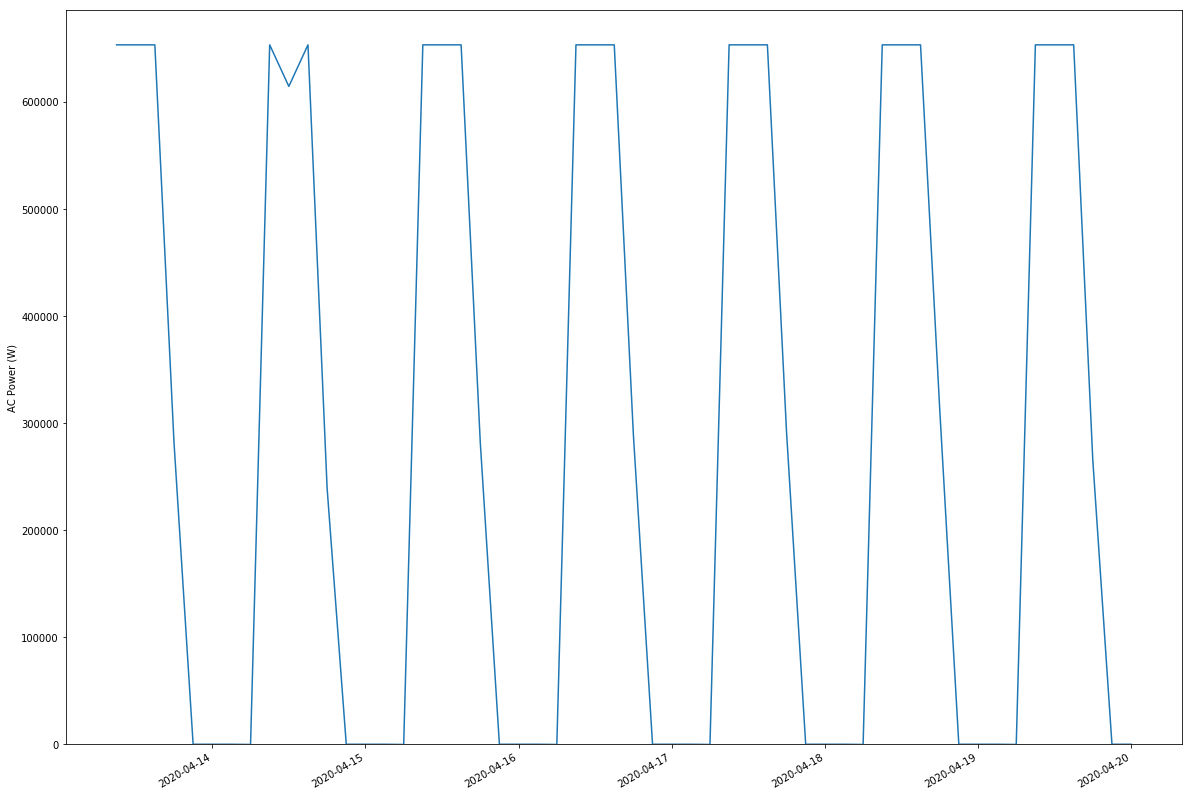

In [25]:
# AC Power
mc.ac.fillna(0).plot(figsize=(20,15));
plt.ylim(0, None);
plt.ylabel('AC Power (W)');

In [27]:
mc.ac.fillna(0)

2020-04-13 09:00:00-07:00    653000.000000
2020-04-13 12:00:00-07:00    653000.000000
2020-04-13 15:00:00-07:00    653000.000000
2020-04-13 18:00:00-07:00    282157.269358
2020-04-13 21:00:00-07:00         0.000000
2020-04-14 00:00:00-07:00         0.000000
2020-04-14 03:00:00-07:00         0.000000
2020-04-14 06:00:00-07:00      -195.900000
2020-04-14 09:00:00-07:00    653000.000000
2020-04-14 12:00:00-07:00    614231.200502
2020-04-14 15:00:00-07:00    653000.000000
2020-04-14 18:00:00-07:00    238954.632061
2020-04-14 21:00:00-07:00         0.000000
2020-04-15 00:00:00-07:00         0.000000
2020-04-15 03:00:00-07:00         0.000000
2020-04-15 06:00:00-07:00      -195.900000
2020-04-15 09:00:00-07:00    653000.000000
2020-04-15 12:00:00-07:00    653000.000000
2020-04-15 15:00:00-07:00    653000.000000
2020-04-15 18:00:00-07:00    282152.563990
2020-04-15 21:00:00-07:00         0.000000
2020-04-16 00:00:00-07:00         0.000000
2020-04-16 03:00:00-07:00         0.000000
2020-04-16 

In [18]:
# Cloud cover in percent units
transmittance = ((100.0 - cloud_cover) / 100.0) * 0.75
# Irrads is a DataFrame containing ghi, dni, dhi
irrads = liujordan(apparent_zenith, transmittance, airmass_absolute)

NameError: name 'cloud_cover' is not defined

In [ ]:
solpos = Location.get_solarposition(cloud_cover.index)
cs = location.get_clearsky(cloud_cover.index, model='ineichen')
# offset and cloud cover in decimal units here
# larson et. al. use offset = 0.35
ghi = (offset + (1 - offset) * (1 - cloud_cover)) * ghi_clear
dni = disc(ghi, solpos['zenith'], cloud_cover.index)['dni']
dhi = ghi - dni * np.cos(np.radians(solpos['zenith']))